<a href="https://colab.research.google.com/github/BenzineMohammedAymen/Mental-Health-Using-LSTM/blob/main/Metnal%20Health%20Using%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/BenzineMohammedAymen/Mental-Health-Using-LSTM.git

Cloning into 'Mental-Health-Using-LSTM'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


#1- **Upload a corpus of sentences (Mental Health Dataset)**

In [92]:
import pandas as pd
df = pd.read_csv('mental_health.csv')

In [93]:
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [94]:
df.describe()

,label
count,27977.000000
mean,0.494621
std,0.499980
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


#The dataset contain two columns"text" the comments and "label" **1** means considered as a comment which is poisonous with mental health issues, and **0** means not considered.

In [95]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import re

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#2- Perform data cleaning and tokenization to remove stop words, digits,...etc.

In [96]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):
    text = text.lower()
    # Remove punctuation and digits
    text = re.sub(f"[{string.punctuation}0-9]", " ", text)
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    return tokens

df['cleaned_tokens'] = df['text'].apply(clean_and_tokenize)

print(df[['text', 'cleaned_tokens', 'label']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                text  \
0  dear american teens question dutch person hear...   
1  nothing look forward lifei dont many reasons k...   
2  music recommendations im looking expand playli...   
3  im done trying feel betterthe reason im still ...   
4  worried  year old girl subject domestic physic...   

                                      cleaned_tokens  label  
0  [dear, american, teens, question, dutch, perso...      0  
1  [nothing, look, forward, lifei, dont, many, re...      1  
2  [music, recommendations, im, looking, expand, ...      0  
3  [im, done, trying, feel, betterthe, reason, im...      1  
4  [worried, year, old, girl, subject, domestic, ...      1  


#Creating Model (Word2Vec)

In [97]:
import gensim
from gensim.models import Word2Vec


model = Word2Vec(df['cleaned_tokens'], vector_size=250, window=5, min_count=1, workers=4)

model.save("word2vec_model.model")

vector = model.wv['anxiety']
print(vector)

#Find similar words to 'anxiety'
similar_words = model.wv.most_similar('anxiety', topn=5)
print(similar_words)


[ 5.50799727e-01  1.28234044e-01  1.04496372e+00  8.23676705e-01
 -8.90896440e-01 -9.34242249e-01  4.86913294e-01  1.93153933e-01
 -1.11750507e+00 -3.27479631e-01 -5.43180287e-01  8.14009488e-01
 -5.21853328e-01 -1.09884769e-01  1.96653679e-01  2.85529375e-01
 -7.90509582e-01 -3.65388989e-01 -3.99182409e-01 -1.29389882e-01
 -4.47738349e-01 -2.06312522e-01  1.65621459e-01 -4.14879948e-01
 -4.04703394e-02  1.60679668e-01  1.34603262e-01 -8.05871665e-01
 -1.47840106e+00  1.68089604e+00 -8.81335855e-01 -4.27408189e-01
  6.64641142e-01  2.00059384e-01 -5.22722006e-01 -8.31642091e-01
  1.44155957e-02  3.80224943e-01 -3.90291631e-01  6.85162365e-01
 -3.74958664e-01  1.43656790e-01 -9.79018569e-01  2.30380874e-02
  1.69276580e-01 -4.76988077e-01  4.18864638e-01  4.44961727e-01
  7.04532564e-01  4.30505574e-01 -6.98769748e-01 -2.84093358e-02
 -1.57441044e+00  1.12893164e-01  4.38280106e-01 -1.77541125e+00
 -5.83127201e-01 -3.16556767e-02  4.51027185e-01 -1.25850713e+00
 -8.26633990e-01  6.50767

#4- Split your dataset by preparing the inputs and the expected outputs.

In [99]:
from sklearn.model_selection import train_test_split
X=df['cleaned_tokens']
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training features shape: {X_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing labels shape: {y_test.shape}')


Training features shape: (22381,)
Testing features shape: (5596,)
Training labels shape: (22381,)
Testing labels shape: (5596,)


#3- Perform words embedding with the already existing libraries (Word2Vec).

In [100]:
import numpy as np

# Function to average word vectors for a comment
def get_average_word_vector(tokens, model, vector_size):
    word_vectors = []

    for word in tokens:
        if word in model.wv:
            word_vectors.append(model.wv[word])

    if len(word_vectors) == 0:
        return np.zeros(vector_size)

    return np.mean(word_vectors, axis=0)

tokens_list = df['cleaned_tokens'].tolist()

X_train_embeddings = np.array([get_average_word_vector(tokens, model, 250) for tokens in X_train])
X_test_embeddings = np.array([get_average_word_vector(tokens, model, 250) for tokens in X_test])

print(f'shape of the Input features Train : {X_train_embeddings.shape}')
print(f'shape of the Output labels  Train : {y_train.shape}')
print(f'shape of the Input features  Test : {X_test_embeddings.shape}')
print(f'shape of the Output labels test: {y_test.shape}')

shape of the Input features Train : (22381, 250)
shape of the Output labels  Train : (22381,)
shape of the Input features  Test : (5596, 250)
shape of the Output labels test: (5596,)


# for Extract MAX SEQUENCE LENGTH

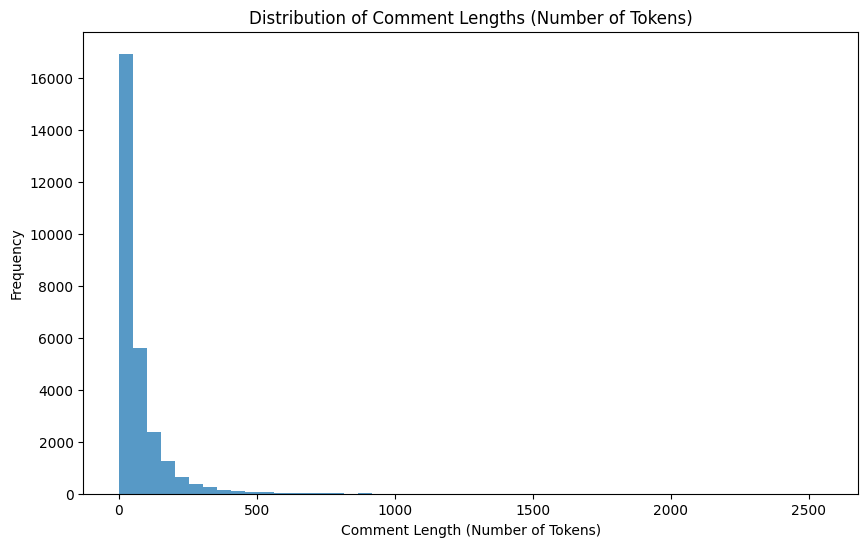

Mean Length: 68.20191585945598
Median Length: 36.0
Standard Deviation: 98.13471172598162
95th Percentile Length: 231.0
99th Percentile Length: 456.23999999999796


In [98]:
import numpy as np
import matplotlib.pyplot as plt

sequence_lengths = df['cleaned_tokens'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=50, alpha=0.75)
plt.title("Distribution of Comment Lengths (Number of Tokens)")
plt.xlabel("Comment Length (Number of Tokens)")
plt.ylabel("Frequency")
plt.show()

mean_length = np.mean(sequence_lengths)
median_length = np.median(sequence_lengths)
std_dev_length = np.std(sequence_lengths)

print(f"Mean Length: {mean_length}")
print(f"Median Length: {median_length}")
print(f"Standard Deviation: {std_dev_length}")

percentile_95 = np.percentile(sequence_lengths, 95)
percentile_99 = np.percentile(sequence_lengths, 99)

print(f"95th Percentile Length: {percentile_95}")
print(f"99th Percentile Length: {percentile_99}")


#5- Design an architecture of LSTM (many-to-one)

In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

# Set parameters
MAX_SEQUENCE_LENGTH = int(percentile_99)  # Maximum length of sequences
EMBEDDING_DIM = 250  # Word2Vec vector size

# Reshape the input data to have 3 dimensions (samples, sequence length, embedding dim)
X_train_padded = X_train_embeddings.reshape(X_train_embeddings.shape[0], 1, X_train_embeddings.shape[1])
X_test_padded = X_test_embeddings.reshape(X_test_embeddings.shape[0], 1, X_test_embeddings.shape[1])


model = Sequential()

# for many-to-one architecture
model.add(LSTM(100, return_sequences=False, input_shape=(X_train_padded.shape[1], X_train_padded.shape[2])))

# Apply Dropout layer for regularization and to avoid overfitting
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100)                 │         140,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,501 (548.83 KB)

 Trainable params: 140,501 (548.83 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
history = model.fit(X_train_padded, y_train, epochs=50, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8574 - loss: 0.3531 - val_accuracy: 0.8949 - val_loss: 0.2776
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8889 - loss: 0.2766 - val_accuracy: 0.9008 - val_loss: 0.2610
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8962 - loss: 0.2624 - val_accuracy: 0.9028 - val_loss: 0.2532
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8997 - loss: 0.2578 - val_accuracy: 0.8971 - val_loss: 0.2561
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9028 - loss: 0.2494 - val_accuracy: 0.9033 - val_loss: 0.2441
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9022 - loss: 0.2470 - val_accuracy: 0.9065 - val_loss: 0.2416
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9045 - loss: 0.2374 - val_accuracy: 0.9055 - val_loss: 0.2417
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9032 - loss: 0.2351 - val_accuracy: 0.

In [106]:
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy*100}")


175/175 - 0s - 2ms/step - accuracy: 0.9099 - loss: 0.2539
Test Loss: 0.2539108395576477
Test Accuracy: 90.99356532096863


In [111]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 0.49
Recall: 0.50
F1-Score: 0.50


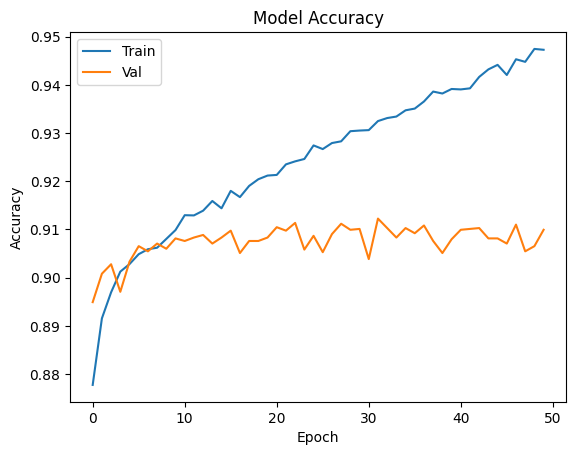

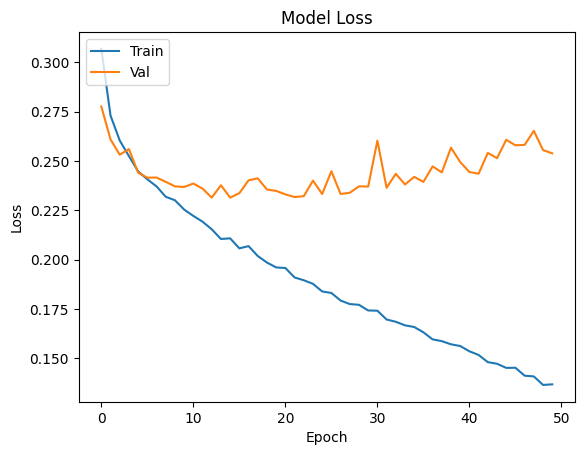

In [107]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [108]:
import pandas as pd

y_test = df['label'].iloc[len(df) - len(X_test_padded):].values

predictions = model.predict(X_test_padded)
predictions = (predictions > 0.5).astype(int)

print("Correctly Classified Samples (first 5):")
correct_count = 0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:  # If the prediction is correct
        print(f"Text: {' '.join(df['cleaned_tokens'].iloc[len(df) - len(X_test_padded) + i])}")
        print(f"True Label: {y_test[i]}")
        print(f"Predicted Label: {predictions[i]}")
        print("-" * 50)
        correct_count += 1
    if correct_count == 5:
        break

print("Misclassified Samples (first 5):")
misclassified_count = 0
for i in range(len(predictions)):
    if predictions[i] != y_test[i]:
        print(f"Text: {' '.join(df['cleaned_tokens'].iloc[len(df) - len(X_test_padded) + i])}")
        print(f"True Label: {y_test[i]}")
        print(f"Predicted Label: {predictions[i]}")
        print("-" * 50)
        misclassified_count += 1
    if misclassified_count == 5:
        break


175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Correctly Classified Samples (first 5):
Text: story incompletesimilar story op case dad spent childhood promising help pursue science career moved along many exorbitant promises coaxed signing life savings guise teaching money management skills afterwards personality instantly changed like replaced body snatcher started holding money hostage control forced flat earth fundamentalist church started incessantly discouraging scientific interests forbidden even seen girl since might lead others think sexually active threatened cut ever associated members many demographics functionally unable friends would scream belittle humiliate hours every day church strict give hobbies sinful tried damage relationships family members would constantly follow around would incessantly act attention much struggled even attempt schoolwork even remaining hobbies quickly psychologically broken started failing classes despite growing honors student years later took secon

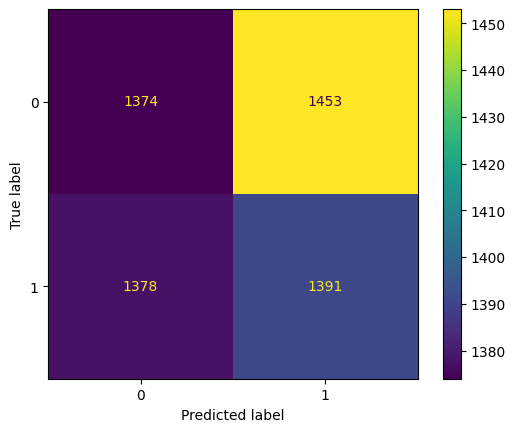

In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [110]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100)                 │         140,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,505 (1.61 MB)

 Trainable params: 140,501 (548.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 281,004 (1.07 MB)